# Kisailus Biomimetics & Nanostructured Materials Lab Non Planar GCode

Written by Adrian Ornelas for avian bone inspired drone cage impact protection bumper

## Theory

Inside avian bones, two major features occur in the thin walled ellipsoid that greatly decrease the maximum stress and reduce local buckling: Ridges and Struts. In order to manufacture an avian bone inspired bumper, we require 3 major parts: the thin walled ellipsoid (mimiced with Epoxy), Struts (mimiced in nylon rods manufactured in this program), and ridges (along direction of rod mimiced with a lightweight fiber matrix). The struts discussed function best at an angle, this program will parametrically create nonplanar GCode based on specified parameters in order to make a manufacturable strut "skeleton" to create the synthetic avian bone.

## Design

In order to mimic struts using additive manufacturing techniques, custom G-Code is written for the Ender 2 Pro and Ultimaker S5 to be able to print in all 3 cartesian directions simulataneously. By doing this we avoid the common additive manufacturing problem of poor layer adhesion negatively impacted curved components.

### Implementation Plan

- Implement n-gon arcs that follow points in 2D
- Translate points by an angle across Z
- Given collection of movements, create GCode encoding instrutions

First Commit 🥳

# Creating 2D N-gon arcs

## Flattening for an ellipse

$f = \frac{a-b}{a}$

$f$ is valid from 0 to 1 and determines the dimension of the height of the created ellipsoid (0 is a circle)

(0.0, 2.5)

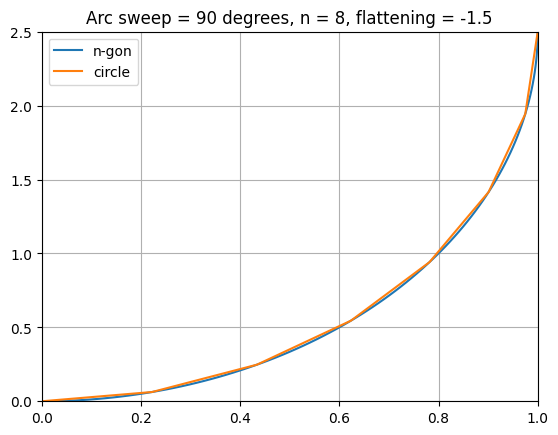

In [34]:
import numpy as np
import matplotlib.pyplot as plt

n_sides = 8
arc_sweep_deg = 90
flattening = -1.5

# Create a circular arc with n_sides

r_min = 1 - flattening
arc_sweep = np.deg2rad(arc_sweep_deg)
arc_offset_deg = 270
arc_offset = np.deg2rad(arc_offset_deg)
angles = np.linspace(arc_offset, arc_offset + arc_sweep, n_sides, endpoint=True)

points_x = np.cos(angles)
points_y = np.sin(angles)
points_y += 1
points_y *= r_min

# True geometry

theta = np.linspace(arc_offset, arc_offset + arc_sweep, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
circle_y += 1
circle_y *= r_min

# Plot n-gon and circle

plt.grid()
plt.plot(circle_x, circle_y, '-',points_x, points_y, '-')
plt.title(f'Arc sweep = {arc_sweep_deg} degrees, n = {n_sides}, flattening = {flattening}')
plt.legend(['n-gon', 'circle'])
plt.xlim([0,r_min])
plt.ylim([0,r_min])